                                        Exploratory Data Analysis                                                  

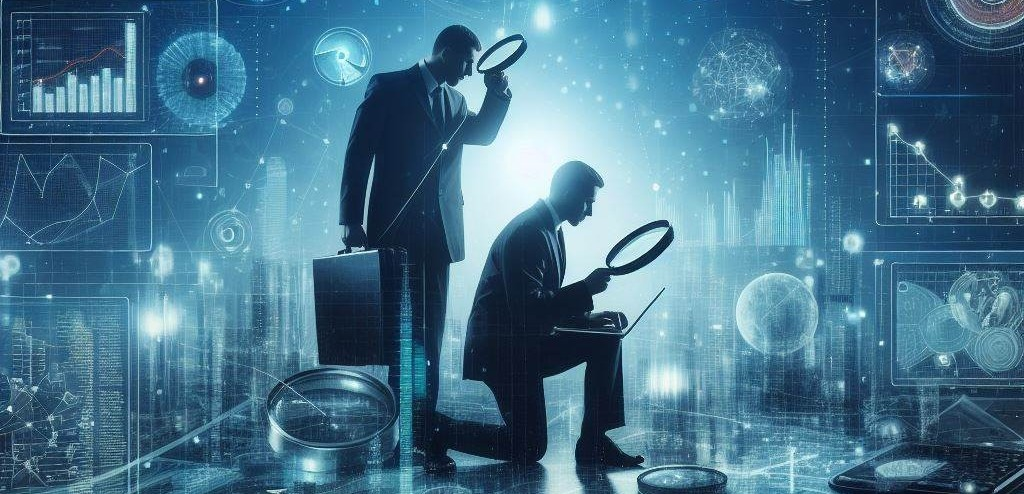

Ya con el dataframe definido, podemos empezar el proceso denominado EDA (An√°lisis Exploratorio de Datos), con el que podremos observar y graficar los datos para empezar a entenderlos mejor.

In [1]:
# Importamos las librer√≠as necesarias para este proceso de ETL
import pandas as pd # Librer√≠a de manipulaci√≥n y an√°lisis de datos.
import numpy as np # Librer√≠a fundamental para la computaci√≥n cient√≠fica en Python. 
import matplotlib.pyplot as plt # Librer√≠a para crear visualizaciones y gr√°ficos en Python.
import seaborn as sns # Librer√≠a para crear gr√°ficos estad√≠sticos e informativos.
import funciones # De funciones.py, donde se encuentran las funciones que utilizaremos en este Python.


                        Recordamos la informaci√≥n del Dataframe df_siniestros_viales                                 

In [2]:
# Creamos un nuevo dataframe con los datos de nuestro .csv
df_siniestros_viales = pd.read_csv(r'Datasets\df_siniestros_viales.csv')

In [3]:
# Con nuestra funci√≥n, vemos los datos finales de nuestro Dataframe
print(funciones.verificar_tipo_datos(df_siniestros_viales))
print(df_siniestros_viales.shape)

     nombre_campo       tipo_datos  no_nulos_%  nulos_%  nulos
0              ID  [<class 'str'>]       100.0      0.0      0
1      N_VICTIMAS  [<class 'int'>]       100.0      0.0      0
2   TIPO_DE_CALLE  [<class 'str'>]       100.0      0.0      0
3          COMUNA  [<class 'int'>]       100.0      0.0      0
4           pos x  [<class 'str'>]       100.0      0.0      0
5           pos y  [<class 'str'>]       100.0      0.0      0
6   PARTICIPANTES  [<class 'str'>]       100.0      0.0      0
7         VICTIMA  [<class 'str'>]       100.0      0.0      0
8         ACUSADO  [<class 'str'>]       100.0      0.0      0
9           FECHA  [<class 'str'>]       100.0      0.0      0
10    ROL_VICTIMA  [<class 'str'>]       100.0      0.0      0
11           SEXO  [<class 'str'>]       100.0      0.0      0
12           EDAD  [<class 'str'>]       100.0      0.0      0
(717, 13)


Este conjunto de datos contiene informaci√≥n sobre los Hechos y las Victimas de siniestros viales en la Ciudad Aut√≥noma de Buenos Aires. Consta de 13 columnas y 717 filas, no posee valores nulos, ni filas duplicadas. A continuaci√≥n se detallan las columnas:

üöë N_VICTIMAS: Cantidad de personas que participaron del siniestro vial.

üõ£Ô∏è TIPO_DE_CALLE: Tipo de pavimento donde ocurri√≥ el hecho.

üèòÔ∏è COMUNA: Comuna de la ciudad donde ocurri√≥ el hecho. (Unidades pol√≠tico administrativas en las que se divide la Ciudad Aut√≥noma de Buenos Aires)

üó∫Ô∏è pos x: Longitud con separador punto. WGS84

üó∫Ô∏è pos y: Latitud con separador punto. WGS84

üë• PARTICIPANTES: Conjunci√≥n de v√≠ctima y acusado.

üöó VICTIMA: Veh√≠culo que ocupaba quien haya fallecido o se haya lastimado a ra√≠z del hecho, o bien peat√≥n/a. Clasificaci√≥n agregada del tipo de veh√≠culos.

üöì ACUSADO: Veh√≠culo que ocupaba quien result√≥ acusado/a del hecho, sin implicar culpabilidad legal.

üìÖ FECHA: Fecha en que ocurri√≥ el hecho, en formato YYYY-MM-DD.

üöë ROL_VICTIMA: Rol que ocupaba la v√≠ctima del siniestro.

üßë SEXO: Sexo informado por fuente policial de la v√≠ctima.

üéÇ EDAD: Edad de la v√≠ctima al momento del siniestro.

Este resumen proporciona una visi√≥n general de la estructura y el contenido del DataFrame üìäüèûÔ∏è

Ahora que nuestro Dataframe tiene las columnas y filas necesarias, podemos empezar a analizar detalladamente qu√© informaci√≥n nos proporciona.

In [4]:
# Convertir la columna 'FECHA' a datetime
df_siniestros_viales['FECHA'] = pd.to_datetime(df_siniestros_viales['FECHA'])

# Extraer el a√±o y el mes en nuevas columnas
df_siniestros_viales['A√±o'] = df_siniestros_viales['FECHA'].dt.year
df_siniestros_viales['Mes'] = df_siniestros_viales['FECHA'].dt.month

# Agrupar por a√±o y mes, sumar el n√∫mero de v√≠ctimas y crear un nuevo DataFrame
df_nuevo = df_siniestros_viales.groupby(['A√±o', 'Mes']).agg({'N_VICTIMAS': 'sum'}).reset_index()

# Pivotar la tabla para obtener un DataFrame con la estructura deseada
df_pivotado = df_nuevo.pivot(index='A√±o', columns='Mes', values='N_VICTIMAS').reset_index()

# Renombrar las columnas de los meses
nombres_meses = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}
df_pivotado = df_pivotado.rename(columns=nombres_meses)

# Calcular la columna 'Total' y agregarla al DataFrame
df_pivotado['Total'] = df_pivotado.iloc[:, 1:].sum(axis=1)

# Reordenar las columnas para que 'Total' est√© al final
columnas_ordenadas = ['A√±o'] + list(nombres_meses.values()) + ['Total']
df_final = df_pivotado[columnas_ordenadas]

# Mostrar el nuevo DataFrame
print(df_final)

Mes   A√±o  Enero  Febrero  Marzo  Abril  Mayo  Junio  Julio  Agosto  \
0    2016      8       12     15     11     7     14     11      13   
1    2017     10       13     20     11    18      9     12       9   
2    2018     14       13     10     17    10     12     14      18   
3    2019      9       10     11      9     9     11      5      14   
4    2020      8        8      5      3     4      3      2       8   
5    2021     13        9      7      5    12      9      7       9   

Mes  Septiembre  Octubre  Noviembre  Diciembre  Total  
0            14       12         14         19    150  
1            17       13         14         14    160  
2            10       12         17         14    161  
3             9        6          8          5    106  
4             5        6          9         26     87  
5             4        5          8          9     97  


                        Graficamos la informaci√≥n del Dataframe df_siniestros_viales                                 

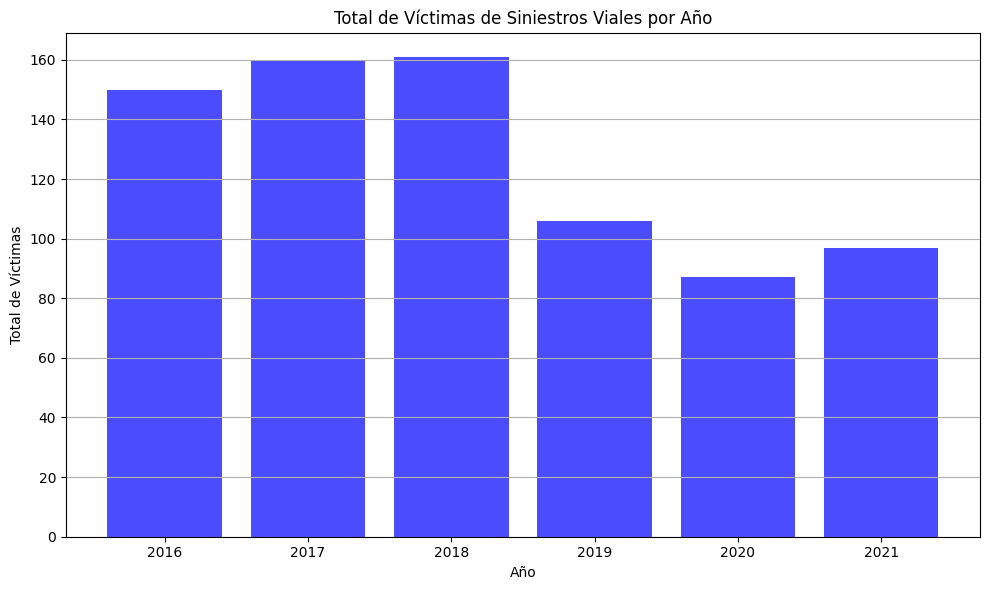

In [5]:
# Datos
a√±os = df_final['A√±o']
total = df_final['Total']

# Crear el gr√°fico de barras
plt.figure(figsize=(10, 6))  # Tama√±o del gr√°fico
plt.bar(a√±os, total, color='blue', alpha=0.7)  # Barras
plt.title('Total de V√≠ctimas de Siniestros Viales por A√±o')
plt.xlabel('A√±o')
plt.ylabel('Total de V√≠ctimas')
plt.grid(axis='y')  # Activar cuadr√≠cula solo en el eje y

# Mostrar el gr√°fico
plt.tight_layout()  # Ajustar el dise√±o del gr√°fico
plt.show()

Como primer an√°lisis, creamos un gr√°fico de barras sencillo que permita visualizar la cantidad de v√≠ctimas por Siniestros Viales en la Ciudad Aut√≥noma de Buenos Aires. Se producen varias conclusiones:
* 2020 tiene la menor cantidad de v√≠ctimas de este per√≠odo. (A√±o atravesado por pandemia)
* 2018 tiene la mayor cantidad de v√≠ctimas en este per√≠odo, y adem√°s, es el √∫nico a√±o que tiene m√°s v√≠ctimas que su a√±o anterior.
* 2019 tiene una gran baja en cuanto al a√±o 2018, con casi un 30% menos de v√≠ctimas.
* 2021 vuelve a normalizar la cantidad de v√≠ctimas si se compara con el √∫ltimo a√±o pre-pand√©mico (2019), pero sigue estando casi un 30% debajo de los a√±os anteriores (2018-2016)

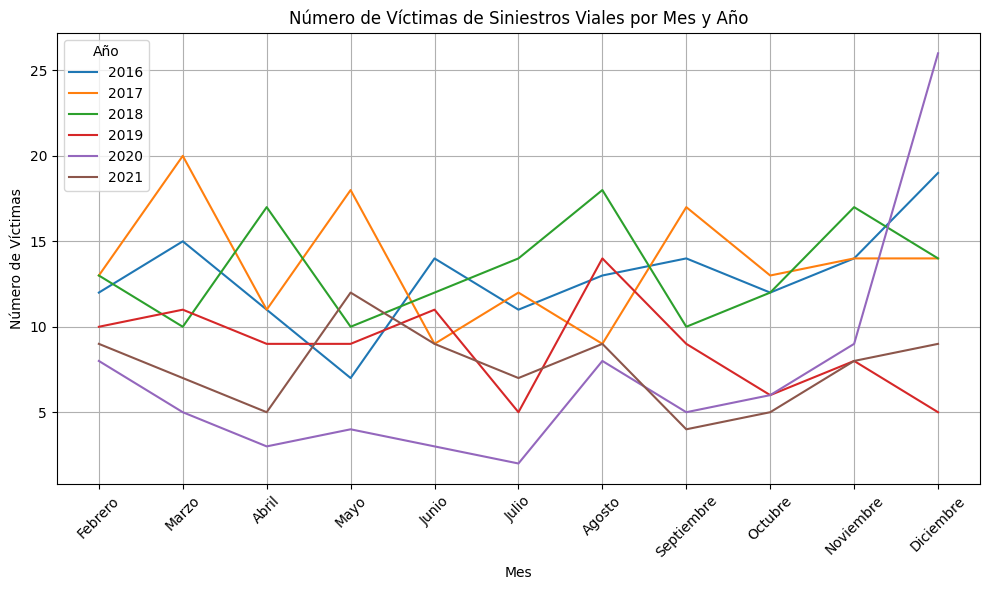

In [6]:
# Datos
a√±os = df_final['A√±o']
meses = list(df_final.columns)[2:-1]  # Excluir las columnas 'A√±o' y 'Total'

# Crear el gr√°fico de l√≠neas
plt.figure(figsize=(10, 6))  # Tama√±o del gr√°fico
for i in range(len(a√±os)):
    plt.plot(meses, df_final.iloc[i, 2:-1], label=str(a√±os[i]))

# Personalizaci√≥n del gr√°fico
plt.title('N√∫mero de V√≠ctimas de Siniestros Viales por Mes y A√±o')
plt.xlabel('Mes')
plt.ylabel('N√∫mero de V√≠ctimas')
plt.legend(title='A√±o')
plt.grid(True)

# Mostrar el gr√°fico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajustar el dise√±o del gr√°fico
plt.show()

Podemos continuar el an√°lisis haciendo foco en el a√±o 2020, con un nuevo gr√°fico que nos indique mes a mes lo sucedido.

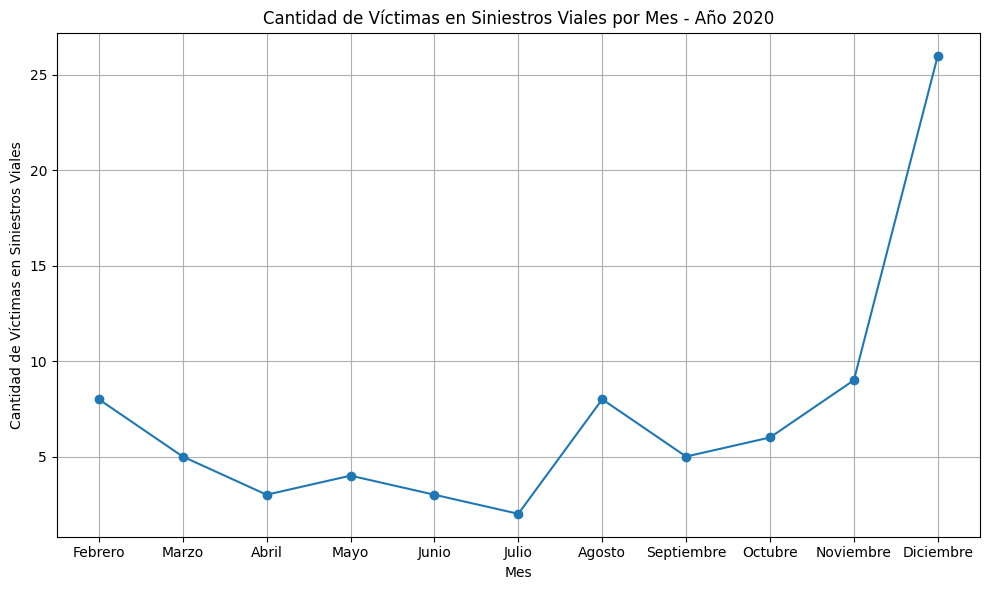

In [7]:
# Filtrar los datos solo para el a√±o 2020
datos_2020 = df_final[df_final['A√±o'] == 2020]

# Crear la gr√°fica de l√≠neas
plt.figure(figsize=(10, 6))
plt.plot(datos_2020.columns[2:-1], datos_2020.iloc[0, 2:-1], marker='o', linestyle='-')

# Agregar etiquetas y t√≠tulo
plt.xlabel('Mes')
plt.ylabel('Cantidad de V√≠ctimas en Siniestros Viales')
plt.title('Cantidad de V√≠ctimas en Siniestros Viales por Mes - A√±o 2020')

# Mostrar la gr√°fica
plt.grid(True)
plt.tight_layout()
plt.show()

Como indica el gr√°fico, el a√±o 2020 fue un a√±o muy err√°tico. Es imposible medirlo con los mismos criterios que al resto de a√±os por la situaci√≥n que vivi√≥ el pa√≠s. El 20 de Marzo de 2020, el ex-presidente Alberto Fern√°ndez, har√≠a uso del Decreto de Necesidad y Urgencia, para comenzar una cuarentena obligatoria que durar√≠a. Para comparar nuestros datos, hago uso del an√°lisis realizado por la Direcci√≥n Nacional de Epidemiolog√≠a e Informaci√≥n Estrat√©gica con datos extra√≠dos del SNVS 2.0.



![Captura de pantalla_21-4-2024_16214_www.argentina.gob.ar.jpeg](<attachment:Captura de pantalla_21-4-2024_16214_www.argentina.gob.ar.jpeg>)

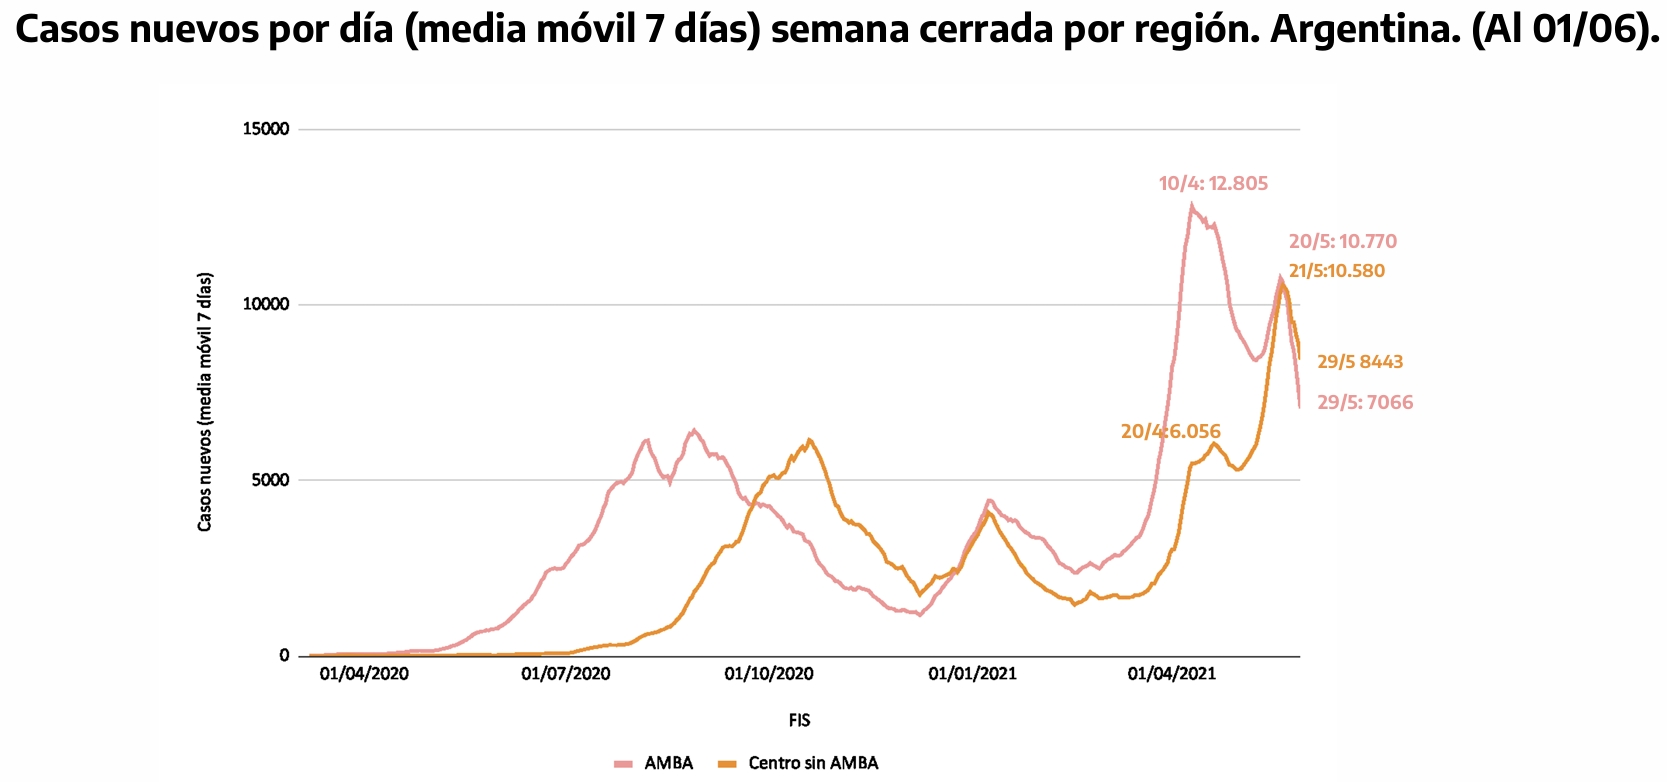

As√≠, podemos confirmar que, en 2020, a medida que los casos de COVID-19 aumentaban, los siniestros viales disminu√≠an. El AMBA fue una de las zonas m√°s afectadas por su cantidad de habitantes, asi como tambien fue una de las zonas que m√°s tiempo estuvo en cuarentena estricta. Hasta Octubre, que como podemos ver en nuestro gr√°fico, los siniestro viales vuelven a aumentar. Para ver c√≥mo este gr√°fico por meses se compara con el resto de a√±os en nuestro an√°lisis, podemos hacer lo siguiente:

                        Agregamos m√°s data al Dataframe df_siniestros_viales                                 

Para realizar el an√°lisis del primer KPi, necesitamos m√°s informaci√≥n. Sobre todo, necesitamos saber la poblaci√≥n de CABA en los a√±os 2016-2021. Para ello, traeremos un nuevo dataframe obtenido en la p√°gina gubernamental INDEC. Con la cual podremos calcular la tasa de homicidios en siniestros viales. (Definimos a la tasa de homicidios en siniestros viales como el n√∫mero de v√≠ctimas fatales en accidentes de tr√°nsito por cada 100,000 habitantes en un √°rea geogr√°fica durante un per√≠odo de tiempo espec√≠fico. Su f√≥rmula es: (N√∫mero de homicidios en siniestros viales / Poblaci√≥n total) * 100,000)

In [8]:
# Ruta del archivo Excel
ruta_archivo = (r'Datasets\c2022_caba_est_c1_1.xlsx')

# Leer el archivo Excel y seleccionar la hoja "Cuadro 1.1"
df_comunas_excel = pd.read_excel(ruta_archivo, sheet_name='Cuadro 1.1', skiprows=2)

# Seleccionar √∫nicamente las columnas necesarias
df_poblacion_comunas = df_comunas_excel[['Comuna', 'Poblacion 2010', 'Poblacion 2022', 'Variacion_Absoluta', 'Variacion_relativa']]
df_poblacion_comunas = df_poblacion_comunas.dropna()

# Mostrar el DataFrame resultante
print(df_poblacion_comunas)

       Comuna  Poblacion 2010  Poblacion 2022  Variacion_Absoluta  \
0       Total       2890151.0       3121707.0            231556.0   
1    Comuna 1        205886.0        223554.0             17668.0   
2    Comuna 2        157932.0        161645.0              3713.0   
3    Comuna 3        187537.0        196240.0              8703.0   
4    Comuna 4        218245.0        229240.0             10995.0   
5    Comuna 5        179005.0        194271.0             15266.0   
6    Comuna 6        176076.0        203043.0             26967.0   
7    Comuna 7        220591.0        215896.0             -4695.0   
8    Comuna 8        187237.0        204367.0             17130.0   
9    Comuna 9        161797.0        169063.0              7266.0   
10  Comuna 10        166022.0        173004.0              6982.0   
11  Comuna 11        189832.0        204601.0             14769.0   
12  Comuna 12        200116.0        236887.0             36771.0   
13  Comuna 13        231331.0     

Con este nuevo dataframe, podemos entender la variaci√≥n en la tasa de homicidios por siniestros viales. Ahora, voy a limpiar un poco los datos para mejorar la usabilidad de este dataframe.

In [9]:
# Eliminar la palabra 'Comuna' de la columna 'Comuna' y convertir el resto a tipo int
df_poblacion_comunas['Comuna'] = df_poblacion_comunas['Comuna'].str.replace('Comuna ', '')

# Cambiar 'Total' por 0 en la columna 'Comuna'
df_poblacion_comunas['Comuna'] = df_poblacion_comunas['Comuna'].replace('Total', 0).astype(int)

# Verificar el resultado
print(df_poblacion_comunas)


    Comuna  Poblacion 2010  Poblacion 2022  Variacion_Absoluta  \
0        0       2890151.0       3121707.0            231556.0   
1        1        205886.0        223554.0             17668.0   
2        2        157932.0        161645.0              3713.0   
3        3        187537.0        196240.0              8703.0   
4        4        218245.0        229240.0             10995.0   
5        5        179005.0        194271.0             15266.0   
6        6        176076.0        203043.0             26967.0   
7        7        220591.0        215896.0             -4695.0   
8        8        187237.0        204367.0             17130.0   
9        9        161797.0        169063.0              7266.0   
10      10        166022.0        173004.0              6982.0   
11      11        189832.0        204601.0             14769.0   
12      12        200116.0        236887.0             36771.0   
13      13        231331.0        264385.0             33054.0   
14      14

Para definir la tasa de homicidios, debemos comparar los datos de nuestro dataframe con el total de v√≠ctimas en siniestros viales, dividirlo por el dato m√°s reciente de la poblaci√≥n disponible (El Censo 2022) y luego multiplicar por 100000

In [10]:
# Obtener el total de poblaci√≥n de 2022
poblacion_2022 = df_poblacion_comunas.loc[0, 'Poblacion 2022']

# Crear el nuevo DataFrame con las columnas requeridas
df_tasa_homicidios = pd.DataFrame({
    'A√±o': df_final['A√±o'],
    'Total_Siniestros': df_final['Total'],
    'Poblacion_2022': poblacion_2022,
})

# Calcular la tasa de homicidios y agregarla al DataFrame
df_tasa_homicidios['Tasa_Homicidios'] = (df_final['Total'] / poblacion_2022) * 100000

# Mostrar el nuevo DataFrame
print(df_tasa_homicidios)


    A√±o  Total_Siniestros  Poblacion_2022  Tasa_Homicidios
0  2016               150       3121707.0         4.805063
1  2017               160       3121707.0         5.125401
2  2018               161       3121707.0         5.157435
3  2019               106       3121707.0         3.395578
4  2020                87       3121707.0         2.786937
5  2021                97       3121707.0         3.107274


Ahora, podremos graficar esta informaci√≥n para compararla con los gr√°ficos anteriores.

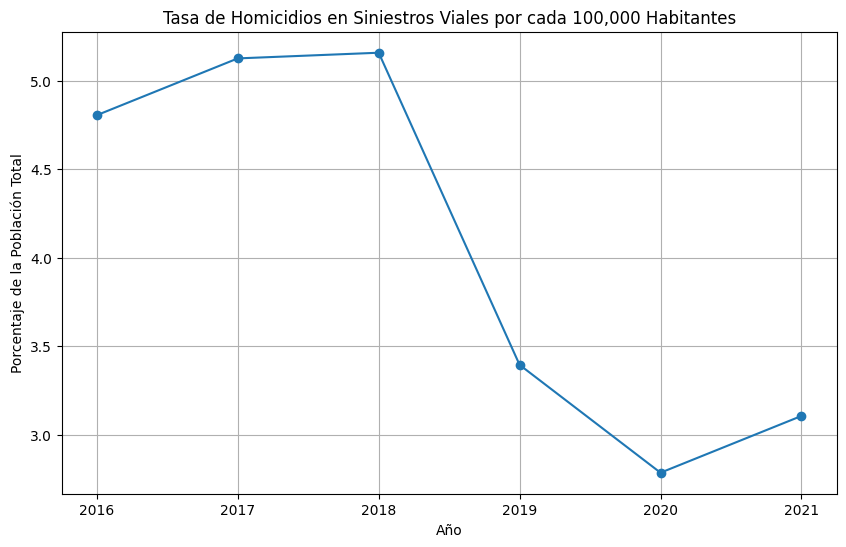

In [11]:

# Crear el gr√°fico de l√≠neas
plt.figure(figsize=(10, 6))
plt.plot(df_tasa_homicidios['A√±o'], df_tasa_homicidios['Tasa_Homicidios'], marker='o', linestyle='-')

# Agregar t√≠tulo y etiquetas de los ejes
plt.title('Tasa de Homicidios en Siniestros Viales por cada 100,000 Habitantes')
plt.xlabel('A√±o')
plt.ylabel('Porcentaje de la Poblaci√≥n Total')

# Mostrar la cuadr√≠cula
plt.grid(True)

# Mostrar el gr√°fico
plt.show()

Para continuar el EDA, me gustar√≠a mostrar c√≥mo var√≠a este gr√°fico por cada comuna. 

In [12]:
# Agrupar los datos por a√±o y comuna y sumar el n√∫mero de v√≠ctimas
df_siniestros_comunas = df_siniestros_viales.groupby(['A√±o', 'COMUNA'])['N_VICTIMAS'].sum().reset_index()

Para ello, cree un peque√±o nuevo dataframe donde se agrupe la cantidad de v√≠ctimas por comuna. Teniendo el valor 0 los siniestros viales que no corresponden a ninguna comuna.

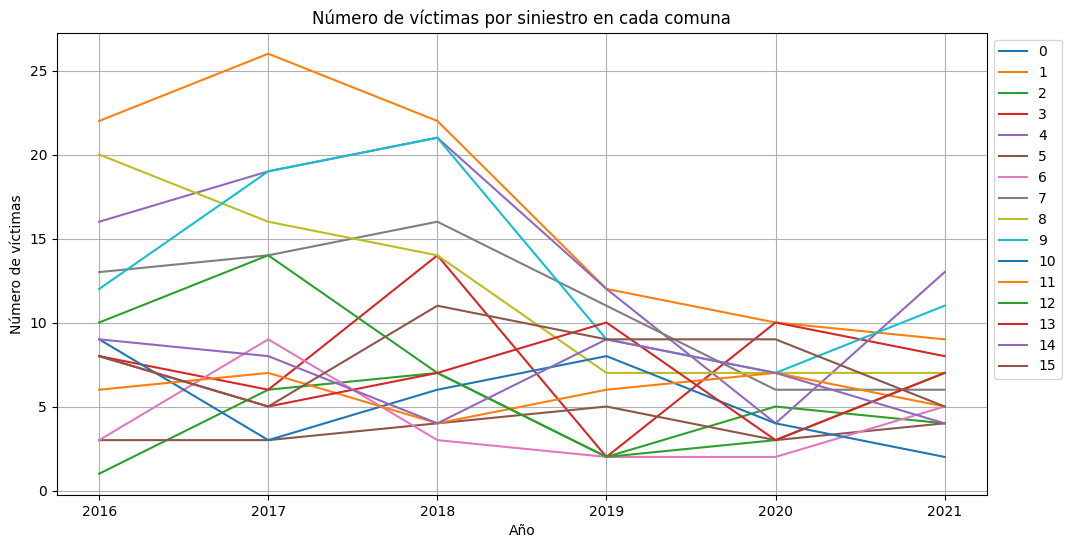

In [13]:
# Crear una figura y ejes
plt.figure(figsize=(12, 6))

# Iterar sobre cada comuna y graficar el n√∫mero de v√≠ctimas por a√±o
for comuna in df_siniestros_comunas['COMUNA'].unique():
    data_comuna = df_siniestros_comunas[df_siniestros_comunas['COMUNA'] == comuna]
    plt.plot(data_comuna['A√±o'], data_comuna['N_VICTIMAS'], label=comuna)

# Configurar el t√≠tulo y etiquetas de los ejes
plt.title('N√∫mero de v√≠ctimas por siniestro en cada comuna')
plt.xlabel('A√±o')
plt.ylabel('N√∫mero de v√≠ctimas')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Mostrar leyenda fuera del gr√°fico
plt.grid(True)

# Mostrar el gr√°fico
plt.show()

Si bien es un gr√°fico √∫til, no creo que sea la mejor manera de entender estos valores. Por lo cual, recurro a utilizar la librer√≠a plotly

In [14]:
import plotly.express as px

# Suponiendo que ya tienes cargado tu dataframe df_siniestros_comunas

fig = px.area(df_siniestros_comunas, x='A√±o', y='N_VICTIMAS', color='COMUNA',
              title='N√∫mero de v√≠ctimas por siniestro en cada comuna',
              labels={'A√±o': 'A√±o', 'N_VICTIMAS': 'N√∫mero de v√≠ctimas'})

fig.update_layout(legend=dict(title='Comuna', yanchor="top", y=0.99, xanchor="left", x=0.01))

# Guardar el gr√°fico como un archivo HTML
fig.write_html("grafico_siniestros_comunas.html")

![Siniestros por comuna](Imagenes\siniestros_por_comuna.jpeg)


Ahora si, tenemos un gr√°fico que nos permite ver la variaci√≥n de los datos en cada comuna:
* La comuna 1 es la m√°s afectada a√±o tras a√±o.
* La comuna 15 es la que manteniene el promedio de siniestros viales m√°s parejo.
* La comuna 4 y 9 tienen siniestros muy parecidos hasta el a√±o 2020.
* Todas las comunas redujeron su cantidad de siniestros viales desde el a√±o 2018 al a√±o 2019.

Con toda esta informaci√≥n, y constat√°ndola con la informaci√≥n proporcionada por el Ministerio de el ex-gobernador de CABA Rodr√≠guez Larreta, se puede concluir que no existe un error en el dataset entre los a√±os 2018 y 2019. Por lo tanto, se puede seguir con el an√°lisis tranquilamente.

In [15]:
# Paso 1: Calcular la sumatoria de siniestros viales por semestre para cada a√±o
for a√±o in df_final['A√±o'].unique():
    # Primer semestre
    primer_semestre = df_final[(df_final['A√±o'] == a√±o)][['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']].sum(axis=1)
    df_final.loc[df_final['A√±o'] == a√±o, 'Suma_Primer_Semestre'] = primer_semestre.sum()
    # Segundo semestre
    segundo_semestre = df_final[(df_final['A√±o'] == a√±o)][['Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
    df_final.loc[df_final['A√±o'] == a√±o, 'Suma_Segundo_Semestre'] = segundo_semestre.sum()

# Paso 2: Calcular la tasa de homicidios en siniestros viales para cada semestre
for a√±o in df_final['A√±o'].unique():
    # Primer semestre
    total_siniestros_primer_semestre = df_final.loc[df_final['A√±o'] == a√±o, 'Suma_Primer_Semestre'].iloc[0]
    poblacion_a√±o = df_tasa_homicidios.loc[df_tasa_homicidios['A√±o'] == a√±o, 'Poblacion_2022'].iloc[0]
    tasa_primer_semestre = (total_siniestros_primer_semestre / poblacion_a√±o) * 100000
    df_final.loc[df_final['A√±o'] == a√±o, 'Tasa_Primer_Semestre'] = tasa_primer_semestre
    
    # Segundo semestre
    total_siniestros_segundo_semestre = df_final.loc[df_final['A√±o'] == a√±o, 'Suma_Segundo_Semestre'].iloc[0]
    tasa_segundo_semestre = (total_siniestros_segundo_semestre / poblacion_a√±o) * 100000
    df_final.loc[df_final['A√±o'] == a√±o, 'Tasa_Segundo_Semestre'] = tasa_segundo_semestre

# Paso 3: Mostrar el DataFrame con las nuevas columnas
print(df_final)




Mes   A√±o  Enero  Febrero  Marzo  Abril  Mayo  Junio  Julio  Agosto  \
0    2016      8       12     15     11     7     14     11      13   
1    2017     10       13     20     11    18      9     12       9   
2    2018     14       13     10     17    10     12     14      18   
3    2019      9       10     11      9     9     11      5      14   
4    2020      8        8      5      3     4      3      2       8   
5    2021     13        9      7      5    12      9      7       9   

Mes  Septiembre  Octubre  Noviembre  Diciembre  Total  Suma_Primer_Semestre  \
0            14       12         14         19    150                  67.0   
1            17       13         14         14    160                  81.0   
2            10       12         17         14    161                  76.0   
3             9        6          8          5    106                  59.0   
4             5        6          9         26     87                  31.0   
5             4        5   

Ahora, podemos graficar que se cumple el primer KPI, y los siniestros viales se redujeron un 10% en el √∫ltimo semestre de nuestros datos. 

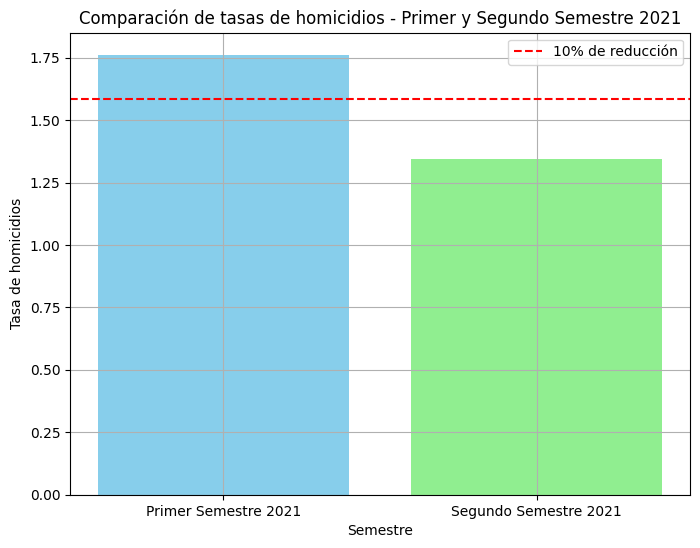

In [16]:
# Datos de las tasas de homicidios del segundo semestre de 2021 y del primer semestre del 2021
tasa_primer_semestre_2021 = 1.761857  # Tasa del primer semestre del 2021
tasa_segundo_semestre_2021 = 1.345418  # Tasa del segundo semestre del 2021

# Calcular la reducci√≥n del 10%
reduccion_10 = tasa_primer_semestre_2021 * 0.9

# Crear el gr√°fico de barras
plt.figure(figsize=(8, 6))
plt.bar(['Primer Semestre 2021', 'Segundo Semestre 2021'], [tasa_primer_semestre_2021, tasa_segundo_semestre_2021], color=['skyblue', 'lightgreen'])
plt.axhline(reduccion_10, color='red', linestyle='--', label='10% de reducci√≥n')

# Etiquetas y t√≠tulo
plt.xlabel('Semestre')
plt.ylabel('Tasa de homicidios')
plt.title('Comparaci√≥n de tasas de homicidios - Primer y Segundo Semestre 2021')
plt.legend()
plt.grid(True)
plt.show()

Ahora, podemos continuar desmenuzando nuestros datos hasta llegar al segundo KPi

                                                  Continuamos el EDA                                 

Con el primer KPI resuelto, podemos avanzar hacia nuevos horizontes gracias a los datos que ya tenemos guardados. Por ejemplo, podemos graficar las edades de las v√≠ctimas de los siniestros viales, y su g√©nero.

C:\Users\loren\AppData\Local\Temp\ipykernel_14616\3731654292.py:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



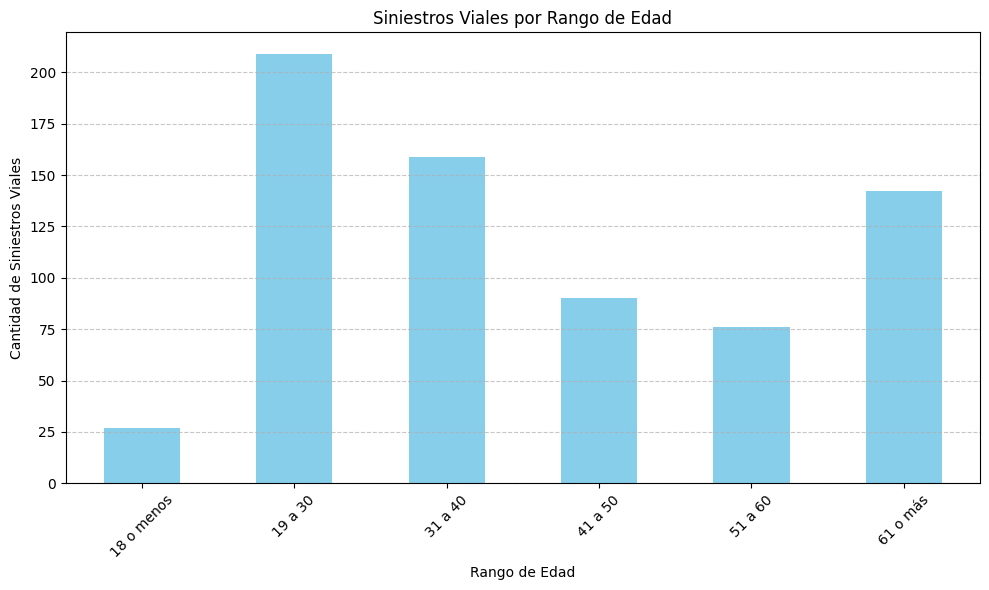

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df_siniestros_viales es tu DataFrame con las columnas 'N_VICTIMAS' y 'EDAD'

# Convertir la columna 'EDAD' a valores num√©ricos
df_siniestros_viales['EDAD'] = pd.to_numeric(df_siniestros_viales['EDAD'], errors='coerce')

# Definir los rangos de edad
rangos_edad = ['18 o menos', '19 a 30', '31 a 40', '41 a 50', '51 a 60', '61 o m√°s']

# Definir los l√≠mites de edad para cada rango
limites_edad = [0, 18, 30, 40, 50, 60, float('inf')]

# Agrupar las edades en los rangos definidos
df_siniestros_viales['Rango_Edad'] = pd.cut(df_siniestros_viales['EDAD'], bins=limites_edad, labels=rangos_edad, right=False)

# Contar la cantidad de siniestros por cada rango de edad
siniestros_por_edad = df_siniestros_viales.groupby('Rango_Edad')['N_VICTIMAS'].sum()

# Crear el gr√°fico de barras
plt.figure(figsize=(10, 6))
siniestros_por_edad.plot(kind='bar', color='skyblue')

# Etiquetas y t√≠tulo
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Siniestros Viales')
plt.title('Siniestros Viales por Rango de Edad')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualizaci√≥n
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gr√°fico
plt.tight_layout()
plt.show()


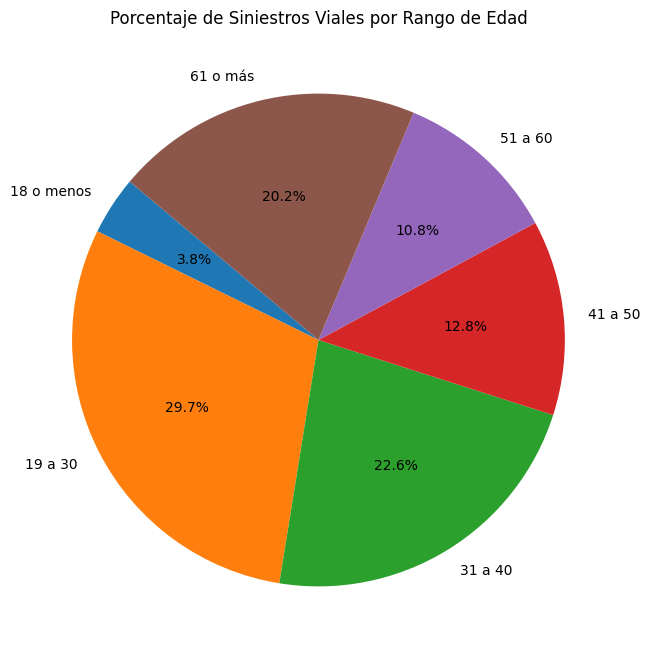

In [18]:
plt.figure(figsize=(8, 8))
plt.pie(siniestros_por_edad, labels=siniestros_por_edad.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Siniestros Viales por Rango de Edad')
plt.show()


Para este an√°lisis, me centr√© en agrupar las edades de las v√≠ctimas en varios grupos:
* Menores de 18 a√±os. Adolescentes que todav√≠a no pueden obtener licencias de conducir legalmente. Representan solamente al 3.8% de las v√≠ctimas por siniestros viales.
* Entre 19 y 30 a√±os. J√≥venes que manejan veh√≠culos, ya sea motos o autos. Representan al 29.7% de las v√≠ctimas.
* De 31 a 40 a√±os. Adultos j√≥venes, representan al 22.6% de las v√≠ctimas.
* De 41 a 50 a√±os. Adultos, representan al 12.8% de las v√≠ctimas
* de 51 a 60 a√±os. Adultos mayores, representan al 10.8% de las v√≠ctimas.
* Mayores de 60 a√±os. Jubilados y abuelos, representan al 20.2% de las v√≠ctimas.
Con este gr√°fico, podemos argumentar que la mayor cantidad de siniestros viales, se cobran la vida de personas entre los 19 y los 40 a√±os. Este grupo et√°reo representa al 52.3% de las v√≠ctimas totales. Seguido de los mayores de 60, con 20.2%

C:\Users\loren\AppData\Local\Temp\ipykernel_14616\1576825467.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



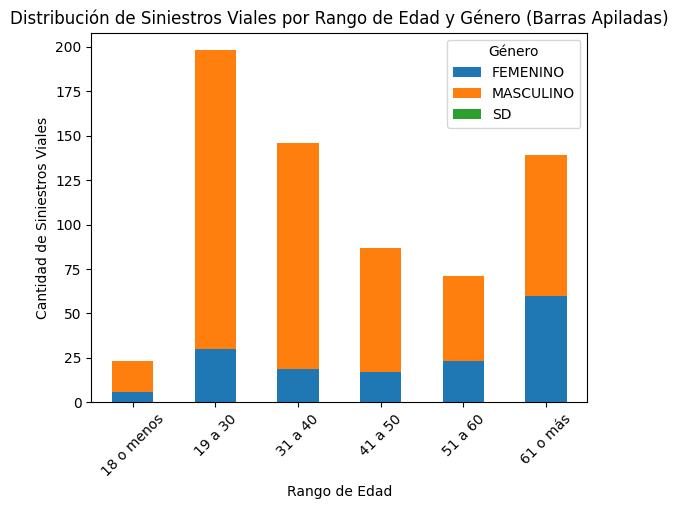

In [19]:
# Crear el gr√°fico de barras apiladas
df_siniestros_viales.groupby(['Rango_Edad', 'SEXO']).size().unstack().plot(kind='bar', stacked=True)

plt.title('Distribuci√≥n de Siniestros Viales por Rango de Edad y G√©nero (Barras Apiladas)')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Siniestros Viales')
plt.xticks(rotation=45)
plt.legend(title='G√©nero')
plt.show()


En este gr√°fico, agregamos a las barras apiladas el dato del Sexo de las v√≠ctimas. En ning√∫n rango et√°reo las mujeres llegan a significar el 50% de las v√≠ctimas. El rango et√°reo m√°s parejo es el de 61 a√±os o m√°s. Esto puede deberse a que hay una gran mayor√≠a de hombres manejando veh√≠culos que mujeres en Argentina.

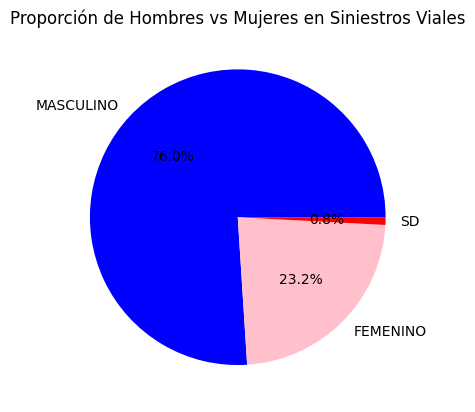

In [20]:
total_victimas = df_siniestros_viales['SEXO'].count()
porcentaje_victimas_por_genero = df_siniestros_viales['SEXO'].value_counts() / total_victimas * 100

# Crear el gr√°fico de torta
porcentaje_victimas_por_genero.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'pink', 'red'])

plt.title('Proporci√≥n de Hombres vs Mujeres en Siniestros Viales')
plt.ylabel('')  # Eliminar la etiqueta del eje y
plt.show()

En su totalidad, las mujeres representan un 23.2% de las v√≠ctimas de siniestros viales en la Ciudad Aut√≥noma de Buenos Aires. Ahora, voy a graficar los veh√≠culos en que se transportaban las v√≠ctimas de estos siniestros

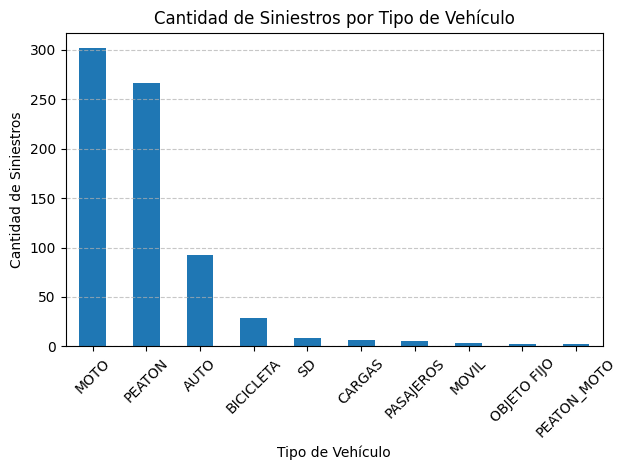

In [21]:
# Contar la cantidad de siniestros por tipo de veh√≠culo
siniestros_por_vehiculo = df_siniestros_viales['VICTIMA'].value_counts()

# Ordenar los tipos de veh√≠culos por la cantidad de siniestros
siniestros_por_vehiculo = siniestros_por_vehiculo.sort_values(ascending=False)

# Crear el gr√°fico de barras
siniestros_por_vehiculo.plot(kind='bar')

plt.title('Cantidad de Siniestros por Tipo de Veh√≠culo')
plt.xlabel('Tipo de Veh√≠culo')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualizaci√≥n
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una rejilla horizontal
plt.tight_layout()  # Ajustar el dise√±o para evitar superposiciones
plt.show()



Como permite ver el gr√°fico, los m√°s indefensos son los que manejan moto y los peatones, quienes lideran la cantidad de v√≠ctimas por siniestros viales. Muy por detr√°s se encuentran los que manejan autom√≥vil. Seguido por ciclistas y otros veh√≠culos varios. Para un mejor impacto visual, decido agrupar todos estos veh√≠culos varios en una sola categor√≠a.

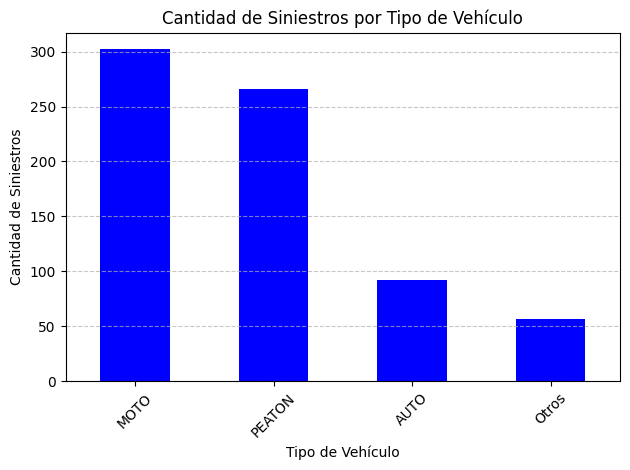

In [22]:
# Contar la cantidad de siniestros por tipo de veh√≠culo
siniestros_por_vehiculo = df_siniestros_viales['VICTIMA'].value_counts()

# Filtrar para incluir solo los tipos de veh√≠culos con al menos 50 v√≠ctimas
vehiculos_principales = siniestros_por_vehiculo[siniestros_por_vehiculo >= 50].index

# Agrupar los tipos de veh√≠culos con menos de 50 v√≠ctimas bajo la categor√≠a 'Otros'
otros_siniestros = siniestros_por_vehiculo[siniestros_por_vehiculo < 50].sum()
siniestros_por_vehiculo = siniestros_por_vehiculo[siniestros_por_vehiculo >= 50]
siniestros_por_vehiculo['Otros'] = otros_siniestros

# Crear el gr√°fico de barras
siniestros_por_vehiculo.plot(kind='bar', color='blue')

plt.title('Cantidad de Siniestros por Tipo de Veh√≠culo')
plt.xlabel('Tipo de Veh√≠culo')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualizaci√≥n
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una rejilla horizontal
plt.tight_layout()  # Ajustar el dise√±o para evitar superposiciones
plt.show()


Vemos que las motos son un grave factor de riesgo a la hora de elegir en qu√© veh√≠culo transportarse. Con esta informaci√≥n podemos graficar el segundo KPi.

                                       Graficando el segundo KPI                                 

In [23]:
# Filtrar los datos para incluir solo los siniestros viales que involucraron motociclistas
siniestros_moto = df_siniestros_viales[df_siniestros_viales['VICTIMA'] == 'MOTO']

# Calcular la cantidad de accidentes mortales con v√≠ctimas en moto en el a√±o anterior (2020)
accidentes_2020 = siniestros_moto[siniestros_moto['A√±o'] == 2020]['N_VICTIMAS'].sum()

# Calcular la cantidad de accidentes mortales con v√≠ctimas en moto en el √∫ltimo a√±o (2021)
accidentes_2021 = siniestros_moto[siniestros_moto['A√±o'] == 2021]['N_VICTIMAS'].sum()

# Calcular el porcentaje de reducci√≥n
porcentaje_reduccion = ((accidentes_2020 - accidentes_2021) / accidentes_2020) * 100

print("Porcentaje de reducci√≥n en la cantidad de accidentes mortales de motociclistas en el √∫ltimo a√±o respecto al a√±o anterior:", porcentaje_reduccion)


Porcentaje de reducci√≥n en la cantidad de accidentes mortales de motociclistas en el √∫ltimo a√±o respecto al a√±o anterior: -53.333333333333336


El KPI propuesto por la empresa no se cumple, ya que el √∫ltimo a√±o, los siniestros viales con motociclistas como v√≠ctimas aumentaron un 53%. 

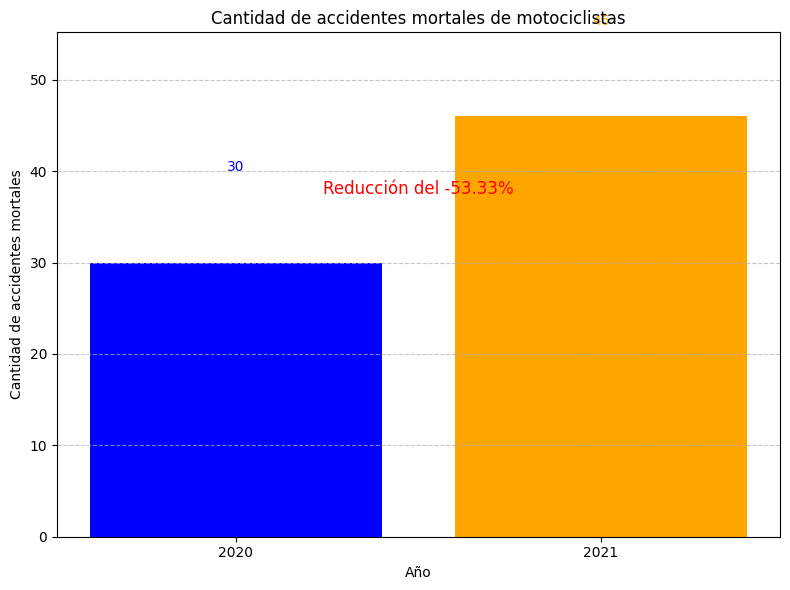

In [24]:
# Calcular la cantidad de accidentes mortales con v√≠ctimas en moto en el a√±o anterior (2020)
accidentes_2020 = siniestros_moto[siniestros_moto['A√±o'] == 2020]['N_VICTIMAS'].sum()

# Calcular la cantidad de accidentes mortales con v√≠ctimas en moto en el √∫ltimo a√±o (2021)
accidentes_2021 = siniestros_moto[siniestros_moto['A√±o'] == 2021]['N_VICTIMAS'].sum()

# Calcular el porcentaje de reducci√≥n
porcentaje_reduccion = ((accidentes_2020 - accidentes_2021) / accidentes_2020) * 100

# Crear un gr√°fico de barras
plt.figure(figsize=(8, 6))
plt.bar(['2020', '2021'], [accidentes_2020, accidentes_2021], color=['blue', 'orange'])
plt.title('Cantidad de accidentes mortales de motociclistas')
plt.xlabel('A√±o')
plt.ylabel('Cantidad de accidentes mortales')
plt.text(0, accidentes_2020 + 10, f'{accidentes_2020}', ha='center', color='blue')
plt.text(1, accidentes_2021 + 10, f'{accidentes_2021}', ha='center', color='orange')
plt.ylim(0, max(accidentes_2020, accidentes_2021) * 1.2)  # Ajustar l√≠mites del eje y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# A√±adir porcentaje de reducci√≥n
plt.text(0.5, (accidentes_2020 + accidentes_2021) / 2, f'Reducci√≥n del {porcentaje_reduccion:.2f}%', ha='center', va='center', fontsize=12, color='red')

plt.show()

Este an√°lisis, indica que se debe trabajar fuertemente en concientizaci√≥n y seguridad vial en CABA en cuanto a accidentes que involucren motocicletas. Por ejemplo:
* Campa√±as de concientizaci√≥n para motociclistas: Con expertos en el √°rea, sobre el uso adecuado del casco y las medidas preventivas necesarias.
* Corroborar y mejorar la infraestructura de los sitios con m√°s accidentes.
* Reforzar la aplicaci√≥n de la ley, implementando controles y penas m√°s estrictas.
* Promover el uso del transporte p√∫blico, que como vimos en el gr√°fico anterior, tiene uno de los porcentajes m√°s bajos de siniestros viales.

Para ahondar m√°s en el problema, me gustar√≠a continuar con el an√°lisis centrandome en las motos. Vamos a ver d√≥nde se dan estos siniestros para entender el problema geolocalizadamente.

In [25]:
# Agrupar por comuna y sumar las v√≠ctimas que manejaban moto
victimas_por_comuna = df_siniestros_viales[df_siniestros_viales['VICTIMA'] == 'MOTO'].groupby('COMUNA')['N_VICTIMAS'].sum()

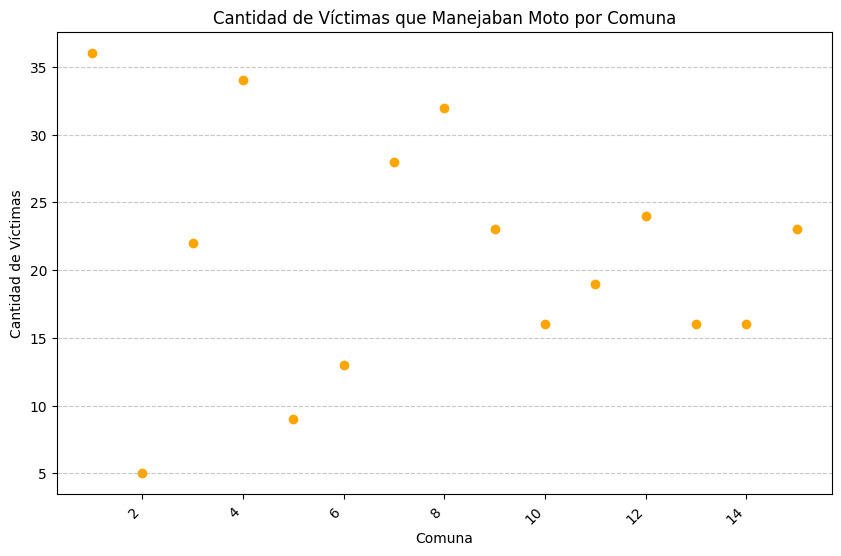

In [27]:
# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(victimas_por_comuna.index, victimas_por_comuna.values, color='orange')
plt.title('Cantidad de V√≠ctimas que Manejaban Moto por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de V√≠ctimas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Con este gr√°fico, podemos entender cuales son las comunas con m√°s siniestros por MOTO en CABA. Veamos en un mapa:

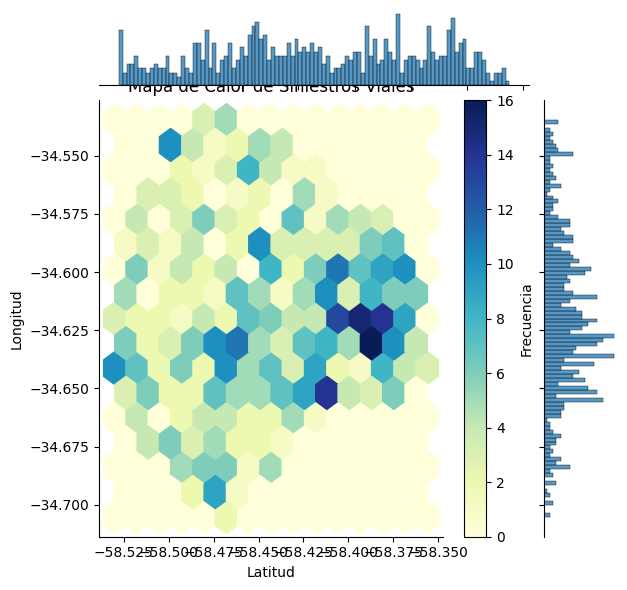

In [34]:
# Convertir las columnas 'pos x' y 'pos y' a tipo num√©rico
df_siniestros_viales['pos x'] = pd.to_numeric(df_siniestros_viales['pos x'], errors='coerce')
df_siniestros_viales['pos y'] = pd.to_numeric(df_siniestros_viales['pos y'], errors='coerce')

# Eliminar filas con valores NaN en 'pos x' o 'pos y'
df_siniestros_viales.dropna(subset=['pos x', 'pos y'], inplace=True)

# Crear el mapa de calor con jointplot
sns.jointplot(
    x='pos x',  # Coordenadas de latitud
    y='pos y',  # Coordenadas de longitud
    data=df_siniestros_viales,
    kind='hex',  # Usar hexbin para visualizar la densidad
    cmap='YlGnBu',  # Colormap
    marginal_kws=dict(bins=100, fill=True)  # Configuraci√≥n de los bins
)

# Configurar el t√≠tulo y etiquetas de los ejes
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Mapa de Calor de Siniestros Viales')

# Mostrar el mapa de calor
plt.colorbar(label='Frecuencia')
plt.show()

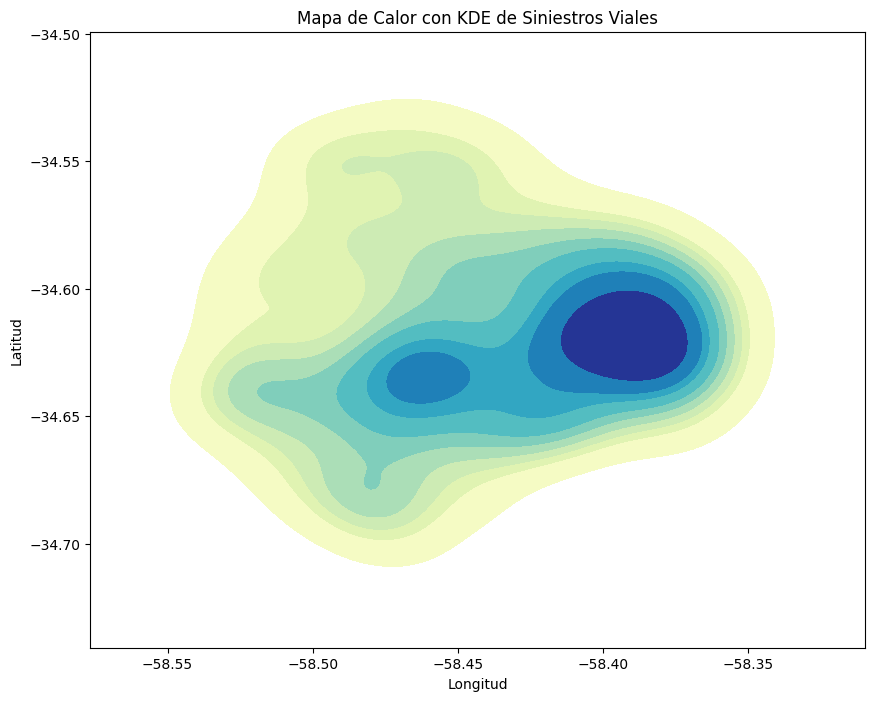

In [37]:
plt.figure(figsize=(10, 8))
sns.kdeplot(x=df_siniestros_viales['pos x'], y=df_siniestros_viales['pos y'], cmap='YlGnBu', fill=True)
plt.title('Mapa de Calor con KDE de Siniestros Viales')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

Si comparamos estos mapas de calor, con el mapa de comunas en CABA, podemos ver cuales son las zonas con m√°s siniestros viales por accidentes de MOTOS.

![Logo de OpenAI](Imagenes\comunas.jpg)


In [ ]:
# Convertir las columnas 'pos_x' y 'pos_y' a tipo float para representar las coordenadas en el mapa
df_siniestros_viales['pos x'] = pd.to_numeric(df_siniestros_viales['pos x'], errors='coerce')
df_siniestros_viales['pos y'] = pd.to_numeric(df_siniestros_viales['pos y'], errors='coerce')

In [41]:
from shapely.geometry import Point
import geopandas as gpd

In [42]:
# Convert√≠ las coordenadas en geometr√≠as de puntos
df_siniestros_viales['pos x'] = df_siniestros_viales['pos x'].astype(float)
df_siniestros_viales['pos y'] = df_siniestros_viales['pos y'].astype(float)

# Cree geometr√≠as de puntos a partir de las coordenadas
geometry = [Point(x, y) for x, y in zip(df_siniestros_viales['pos x'], df_siniestros_viales['pos y'])]

# Cree un GeoDataFrame con las geometr√≠as de puntos
gdf = gpd.GeoDataFrame(df_siniestros_viales, geometry=geometry)

C:\Users\loren\AppData\Local\Temp\ipykernel_14616\1487916159.py:17: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\loren\AppData\Local\Temp\ipykernel_14616\1487916159.py:17: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\loren\AppData\Local\Temp\ipykernel_14616\1487916159.py:17: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\loren\AppData\Local\Temp\ipykernel_14616\1487916159.py:17: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS befor

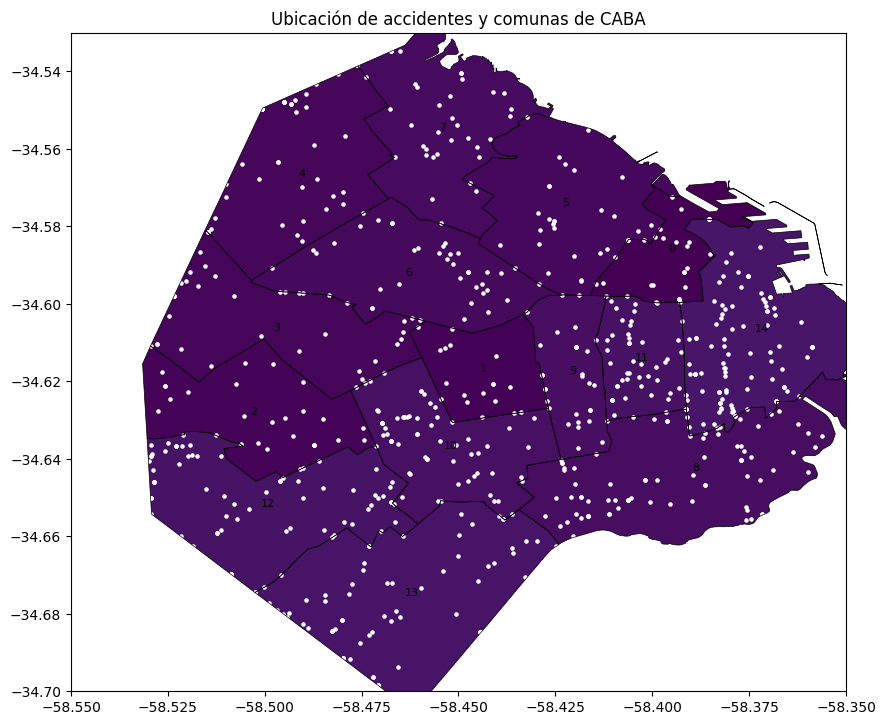

In [43]:
# Cargue los datos de las comunas de CABA
url = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/comunas/comunas.geojson"
comunas = gpd.read_file(url)

# Asignar un color a cada comuna utilizando la paleta viridis
num_comunas = len(comunas)
colores_comunas = plt.cm.viridis(range(num_comunas))

# Crear el mapa base de CABA
fig, ax = plt.subplots(figsize=(10, 10))
comunas.boundary.plot(ax=ax, color='black', linewidth=0.5)  # Enmarcar las comunas

# Graficar los pol√≠gonos de cada comuna con un color diferente
for i in range(num_comunas):
    comunas[comunas.index == i].plot(ax=ax, color=colores_comunas[i])
    # Obtener el centroide de la comuna y agregar el n√∫mero de comuna como texto
    centroid = comunas[comunas.index == i].geometry.centroid.values[0]
    ax.text(centroid.x, centroid.y, str(i), fontsize=8, ha='center', va='center')

# A√±adir los puntos blancos
gdf.plot(ax=ax, color='white', markersize=5)

# Ajustar los l√≠mites del mapa para centrarse en CABA
ax.set_xlim([-58.55, -58.35])  # Ajustar los l√≠mites longitudinales
ax.set_ylim([-34.70, -34.53])  # Ajustar los l√≠mites latitudinales

# A√±adir t√≠tulo y leyenda
plt.title('Ubicaci√≥n de accidentes y comunas de CABA')

# Mostrar el mapa
plt.show()

En esta representaci√≥n gr√°fica, se pueden apreciar las ubicaciones geogr√°ficas de los siniestros viales, sin embargo, los n√∫meros en las comunas son incorrectos. Por ello, adjunt√© un mapa con los n√∫meros de las comunas anteriormente.

Para finalizar el an√°lisis exploratorio de datos, voy a graficar dos datos que me parecen de suma importancia. Los tipos de calle donde se produjeron estos siniestros.

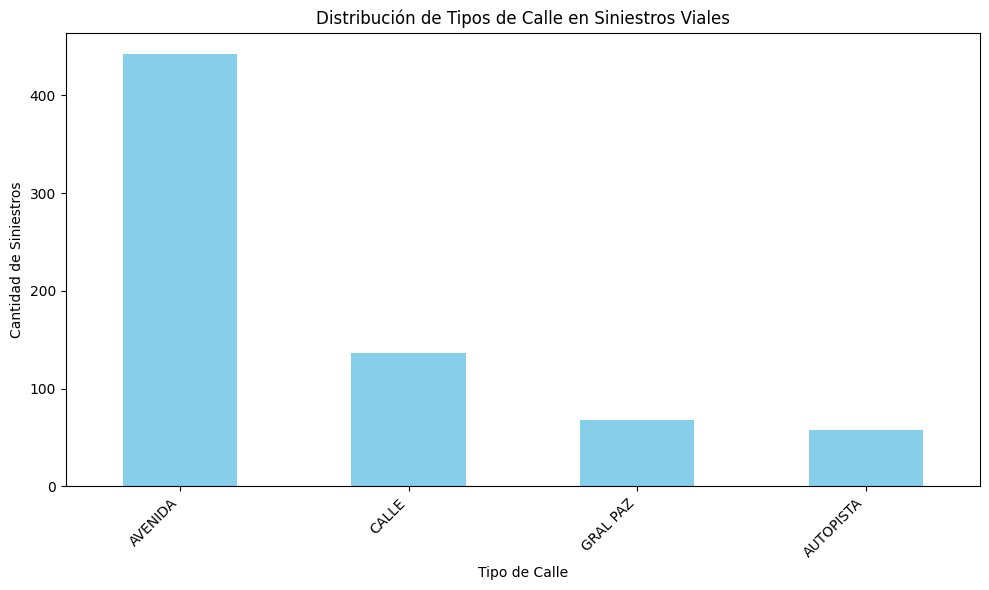

In [44]:
# Crear el gr√°fico de barras
plt.figure(figsize=(10, 6))
df_siniestros_viales['TIPO_DE_CALLE'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribuci√≥n de Tipos de Calle en Siniestros Viales')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Por mucha diferencia, podemos notar que la gran mayor√≠a de siniestros viales en las comunas de CABA ocurren en avenidas. Con esta informaci√≥n ya analizada, podemos saber con datos certeros todo lo siguiente:
* En CABA, los siniestros viales representan al rededor del 5% de la tasa de homicidios sobre la poblaci√≥n total.
* Los hombres representan m√°s del 70% de las v√≠ctimas fatales en siniestros viales.
* Los rangos et√°reos con m√°s accidentes son los j√≥venes entre 19 y 40 a√±os. Y los jubilados de m√°s de 60.
* El veh√≠culo con m√°s v√≠ctimas fatales es la moto. 
* Las comunas con m√°s v√≠ctimas fatales son la 1, la 4 y la 8.
* El tipo de calle donde ocurren m√°s siniestros son las avenidas.

                                                Tercer KPI                                                       

Para finalizar, quiero graficar el tercer y √∫ltimo KPI, en el cual muestro c√≥mo el a√±o 2021 tuvo una reducci√≥n en su cantidad de siniestros viales sobre autopistas frente al a√±o 2020

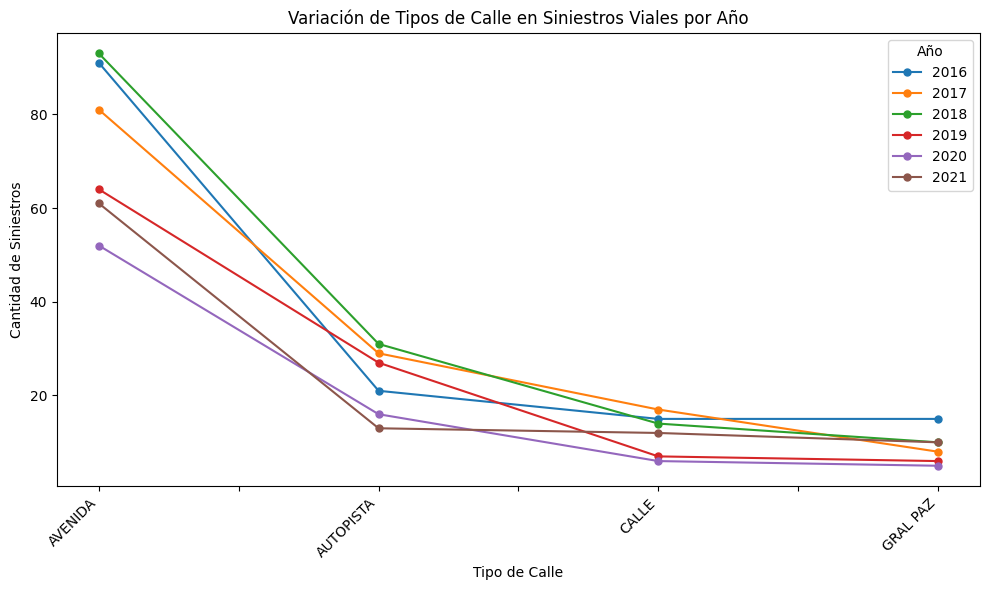

In [46]:
# Crear el gr√°fico de l√≠neas
plt.figure(figsize=(10, 6))
for year in df_siniestros_viales['A√±o'].unique():
    data_year = df_siniestros_viales[df_siniestros_viales['A√±o'] == year]
    data_year['TIPO_DE_CALLE'].value_counts().plot(kind='line', marker='o', markersize=5, label=str(year))

plt.title('Variaci√≥n de Tipos de Calle en Siniestros Viales por A√±o')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=45, ha='right')
plt.legend(title='A√±o')
plt.tight_layout()
plt.show()


                                     Guardamos todos nuestros Dataframes para llevar a Streamlit                  

In [53]:
# Guardamos el Dataframe m√°s grande actualizado.
df_siniestros_viales.to_csv('df_siniestros_viales_streamlit.csv', index=False)

# Guardamos el Dataframe con la cantidad de siniestros por a√±o por comuna.
df_siniestros_comunas.to_csv('df_siniestros_comunas.csv', index=False)

# Guardamos el Dataframe con la cantidad de siniestros por a√±o por mes.
df_final.to_csv('df_siniestros_anios.csv', index=False)